# SPARKS FOUNDATION: DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

STEP-1:IMPORTING THE LIBRARIES

In [37]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#Loading and reading the data
url='http://bit.ly/w-data'
ds=pd.read_csv(url)
print('Data imported successfully')
ds.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [39]:
ds.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [40]:
ds.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [41]:
ds.shape

(25, 2)

In [42]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [43]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [44]:
#To check the null or missing values if any
ds.isnull().sum()

Hours     0
Scores    0
dtype: int64

STEP-2:DATA VISUALIZATION

 Plotting the distribution of scores

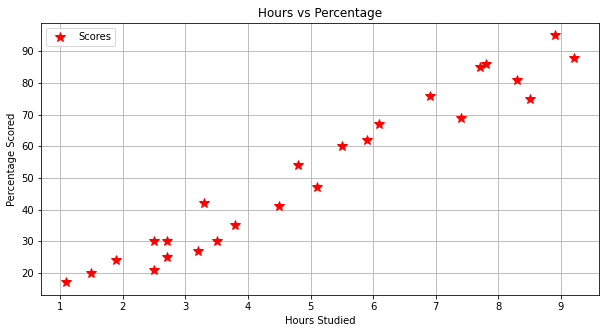

In [45]:
plt.rcParams['figure.figsize']=[10,5]
ds.plot(x='Hours',y='Scores',style='*',color='red',markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.grid()
plt.show()

From the above graph we can clearly observe the positive linear relation between the variables, hours_studied and percentage_scored.The percentage_score increases as the hours_studied increases.

STEP-3:DATA PREPARATION

In [46]:
#Splitting the data using iloc function.
x=ds.iloc[:,:1].values
y=ds.iloc[:,1:].values

In [47]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [48]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [49]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

STEP-4:TRAINING THE ALGORITHM 

In [50]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print('Training of your data is completed successfully!')

Training of your data is completed successfully!


In [51]:
#Visualizing Data Model

In [52]:
#Plotting the regression line

In [53]:
line=model.coef_*x+model.intercept_

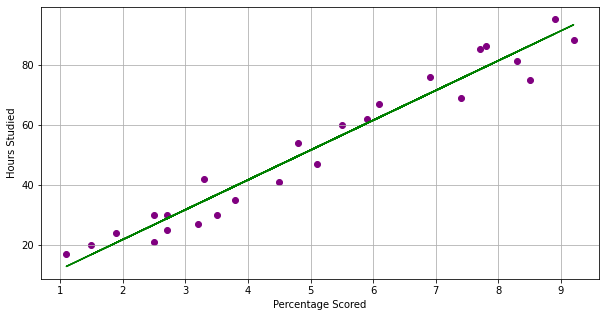

In [54]:
#plotting for the test data
plt.rcParams['figure.figsize']=[10,5]
plt.scatter(x,y,color='purple')
plt.plot(x,line,color='green')
plt.xlabel('Percentage Scored')
plt.ylabel('Hours Studied')
plt.grid()
plt.show()

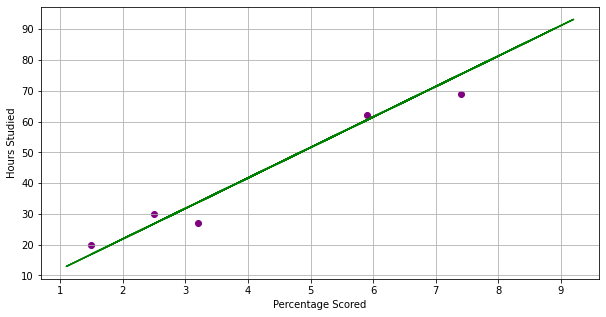

In [55]:
plt.rcParams['figure.figsize']=[10,5]
plt.scatter(x_test,y_test,color='purple')
plt.plot(x,line,color='green')
plt.xlabel('Percentage Scored')
plt.ylabel('Hours Studied')
plt.grid()
plt.show()

In [56]:
print(x_test)#Testing data-In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


STEP-5: MAKING PREDICTIONS
    

In [58]:

y_pred=model.predict(x_test)#Predicting the scores

In [59]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [60]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [61]:
#Comparing Actual vs Predicted
comp=pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [62]:
#Testing with your own data
hours=9.25
own_pred=model.predict([[hours]])
print('The predicted score if a person studies for',hours,'hours is',own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


Hence It can be concluded that the predicted score if a person studies for 9.25 hours is [93.69173249]

STEP-7:EVALUATING THE MODEL

In [64]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
